<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230706tiger_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
!unzip /content/tiger.zip

Archive:  /content/tiger.zip
  inflating: tiger/animal-g31ef62795_1280.jpg  
  inflating: tiger/animal-g31ef62795_1280.xml  
  inflating: tiger/animal-g5a797421c_1280.jpg  
  inflating: tiger/animal-g5a797421c_1280.xml  
  inflating: tiger/animal-ga5b7f5919_1280.jpg  
  inflating: tiger/animal-ga5b7f5919_1280.xml  
  inflating: tiger/animals-g46ff41ef6_1280.jpg  
  inflating: tiger/animals-g46ff41ef6_1280.xml  
  inflating: tiger/a-tiger-g2daf9c795_1280.jpg  
  inflating: tiger/a-tiger-g2daf9c795_1280.xml  
  inflating: tiger/a-tiger-gfcf926374_1280.jpg  
  inflating: tiger/a-tiger-gfcf926374_1280.xml  
  inflating: tiger/tiger-g02ab22865_1280.jpg  
  inflating: tiger/tiger-g02ab22865_1280.xml  
  inflating: tiger/tiger-g08198becb_1280.jpg  
  inflating: tiger/tiger-g08198becb_1280.xml  
  inflating: tiger/tiger-g0c6a28fa0_1280.jpg  
  inflating: tiger/tiger-g0c6a28fa0_1280.xml  
  inflating: tiger/tiger-g10081f237_1280.jpg  
  inflating: tiger/tiger-g10081f237_1280.xml  
  inflating: 

In [3]:
# xml에서 바운딩 좌표 정보를 읽어오는 함수

import glob
import xml.etree.ElementTree as ET

# 함수 가져오기

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):

        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = member.find('name').text

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [14]:
Image_path = '/content/tiger'

In [15]:
import os
#os를 이용하여 path를 찾아 xml파싱하여 csv로 바꿔주기
file_name = 'label_cats.csv'
csv_path = os.path.join(Image_path)

xml_df = xml_to_csv(csv_path)
xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,a-tiger-gfcf926374_1280.jpg,1280,960,tiger,287,50,1182,926
1,tiger-g1efdfe445_1280.jpg,1280,853,tiger,317,82,677,446
2,tiger-g59cd91e61_1280.jpg,1280,750,tiger,203,85,541,383
3,tiger-g254edb2f8_1280.jpg,1280,853,tiger,557,126,1023,578
4,tiger-g55c9e9b7b_1280.jpg,1280,850,tiger,432,143,1037,733
5,tiger-g29f42a213_1280.jpg,1280,806,tiger,354,102,721,444
6,animal-g31ef62795_1280.jpg,1280,1006,tiger,264,49,1228,953
7,tiger-g378811461_1280.jpg,1280,854,tiger,306,226,591,488
8,tiger-g1f1d85038_1280.jpg,1280,853,tiger,447,40,1099,719
9,tiger-gdb3477447_1280.jpg,1280,855,tiger,768,181,1073,512


In [16]:
xml_df.to_csv(file_name)

In [17]:
images = xml_df.iloc[:,0].values
images[:5]

array(['a-tiger-gfcf926374_1280.jpg', 'tiger-g1efdfe445_1280.jpg',
       'tiger-g59cd91e61_1280.jpg', 'tiger-g254edb2f8_1280.jpg',
       'tiger-g55c9e9b7b_1280.jpg'], dtype=object)

In [18]:
# target data
points = xml_df.iloc[:,4:].values
points[:5]

array([[ 287,   50, 1182,  926],
       [ 317,   82,  677,  446],
       [ 203,   85,  541,  383],
       [ 557,  126, 1023,  578],
       [ 432,  143, 1037,  733]])

In [20]:
import PIL

dataset_image = []
dataset_bbs = []

for file, point in zip(images,points):
  f = os.path.join(Image_path, file)
  image = PIL.Image.open(f)
  arr= np.array(image)
  dataset_image.append(arr)
  dataset_bbs.append(point)

In [21]:
dataset_images = np.array(dataset_image)
dataset_bbs= np.array(dataset_bbs)

<ipython-input-21-bf31c4991657>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset_images = np.array(dataset_image)


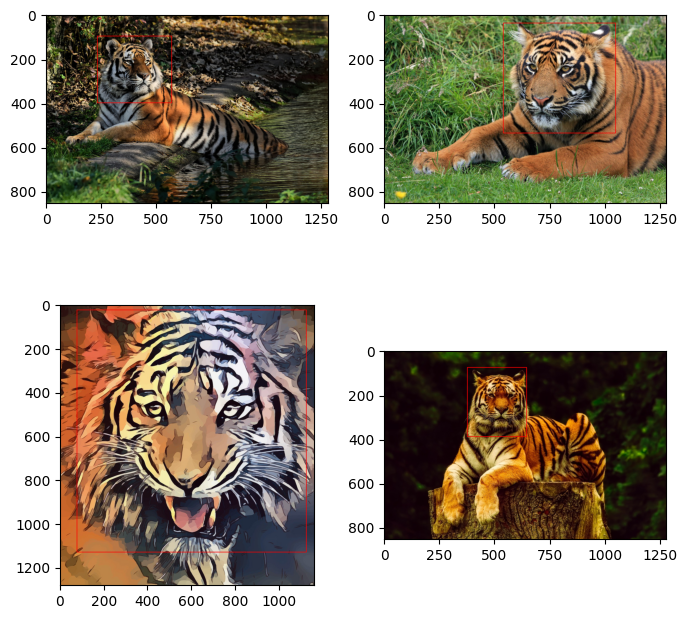

In [23]:
import cv2

samples = np.random.randint(30, size=4)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    points = dataset_bbs[idx].reshape(2, 2)
    img = cv2.rectangle(dataset_images[idx].copy(),
                        tuple(points[0]),
                        tuple(points[1]),
                        color=(255, 0, 0),
                        thickness=2)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
plt.show()

# test data

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(dataset_images, dataset_bbs, test_size=0.2, random_state=42)

In [25]:
X_train = X_train/255.
X_val = X_val/255.

In [26]:
y_train  =y_train.astype('float32')
y_val  =y_val.astype('float32')

In [33]:
X_train.shape

(24,)

In [39]:
from tensorflow.keras.applications import MobileNetV2

base = MobileNetV2(
    include_top = False,
    weights='imagenet',
    input_shape=(224,224,3)
)
base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [40]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(4)
])

In [41]:
from keras.optimizers import Adam

model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = 'mse',
    metrics = ['mse']
)

In [42]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

ckpt_path = './ckpt/cats_bbs.ckpt'
ckpt = ModelCheckpoint(
    ckpt_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss'
)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,
    patience=2,
    verbose=1)

In [43]:
EPOCHS = 30
BATCH_SIZE = 4

history = model.fit (
    X_train, y_train,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val, y_val),
    callbacks=[ckpt,reduce_lr],
    verbose = 1
)

ValueError: ignored

# augmentation

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
!gdown https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

Downloading...
From: https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:00<00:00, 89.5MB/s]


In [3]:
!unzip /content/cats_and_dogs_filtered.zip

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

## 이미지 증강 확인

In [4]:
data_root = '/content/cats_and_dogs_filtered'

In [5]:
fname = '/content/cats_and_dogs_filtered/train/cats/cat.10.jpg'

In [6]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img = image.load_img(fname)
type(img)

PIL.JpegImagePlugin.JpegImageFile

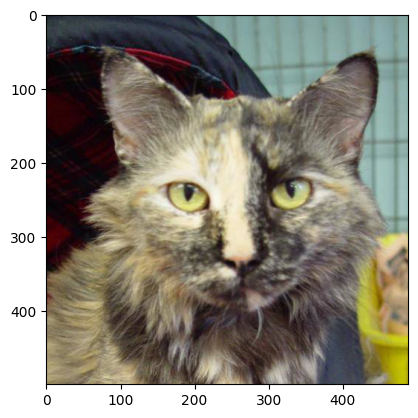

In [7]:
plt.imshow(img)
plt.show()

In [8]:
X = image.img_to_array(img)
type(X)

numpy.ndarray

In [9]:
X.shape

(499, 489, 3)

In [11]:
X = X.reshape(1,499,489,3)# batch사이즈에 맞추려고 차원을 하나 늘렸다
X.shape

(1, 499, 489, 3)

In [12]:
gen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    vertical_flip=True
)

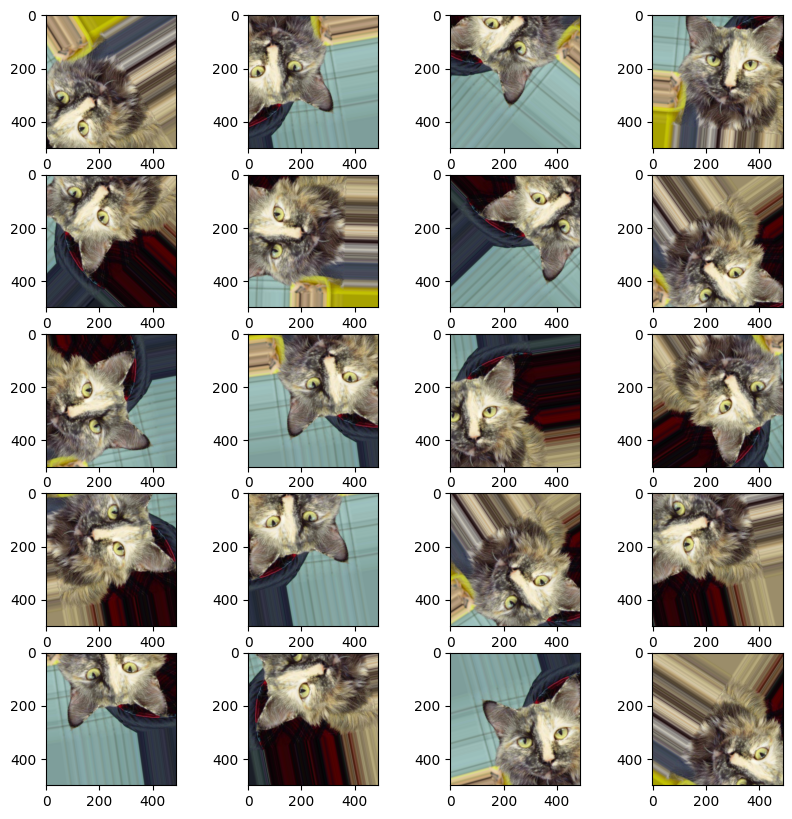

In [14]:
idx = 0
axs = []
fig = plt.figure(figsize=(10, 10))
for batch in gen.flow(X, batch_size=1):
    axs.append(fig.add_subplot(5, 4, idx+1))
    axs[idx].imshow(image.array_to_img(batch[0]))
    idx = idx + 1
    if idx%20 == 0:
        break
plt.show()

In [18]:
import os
train_dir = os.path.join(data_root, 'train')
val_dir = os.path.join(data_root, 'validation')

In [19]:
train_gen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=90,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    vertical_flip=True
)

In [20]:
val_gen = ImageDataGenerator(rescale=1./255.)

In [21]:
BATCH = 32
Image = (224,224)

train_ds = train_gen.flow_from_directory(
    train_dir,
    batch_size=BATCH,
    target_size=Image,
    class_mode='binary'
)

val_ds = val_gen.flow_from_directory(
    val_dir,
    batch_size=BATCH,
    target_size=Image,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 모델 구성

In [25]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
from tensorflow import keras
from keras import layers

def build_model():
    model = keras.Sequential([
        layers.Conv2D(128, 3, activation='relu', input_shape=(224, 224, 3)),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),

        layers.Conv2D(32, 3, activation='relu'),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# 모델 생성
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                  

In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [34]:
Epochs = 10

history = model.fit(
    train_ds,
    epochs=Epochs,
    validation_data = val_ds,
    verbose=1
)

Epoch 1/10
12/63 [====>.........................] - ETA: 23:04 - loss: 0.7853 - accuracy: 0.4974

KeyboardInterrupt: ignored